# Multivariate Linear Regression

In this notebook, we use multivariable linear regression to predict the profit of a startup based on it's spending in various areas

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
plt.rcParams['figure.figsize'] = [12, 9]
%matplotlib notebook

## Load and process data. 

So we use Pandas to read the data. Of course, to visualize this data properly, we are only limited to 3 dimensions. So, for this example, we take two columns to train against. Of course we can definitely use all of the columns available to us (specifically the Administration cost). The regression formula can definitely work with any number of inputs. We'll be concerning ourselves with the R&D Spend, Marketing Spend and Profit in our dataset. We also want to filter out any columns where both R&D Spend and Marketing Spend are equal to $0.00. In this case, it would imply that a startup is earning profit by not spending any money at all!

In [2]:
df = pd.read_csv('data/50_startups.csv')
df = df[["R&D Spend", "Marketing Spend", "Profit"]]
df = df[(df["R&D Spend"] > 0) | (df["Marketing Spend"] > 0)]
df

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
...,...,...,...
44,22177.74,28334.72,65200.33
45,1000.23,1903.93,64926.08
46,1315.46,297114.46,49490.75
48,542.05,0.00,35673.41


Now we extract our data into variables and plot it! In our case, `x` is our R&D Spend, `y` is our Marketing Spend, `z` is our Profit. I also divided each axis by 1000 before I plotted it to make the graph look nicer.

<IPython.core.display.Javascript object>


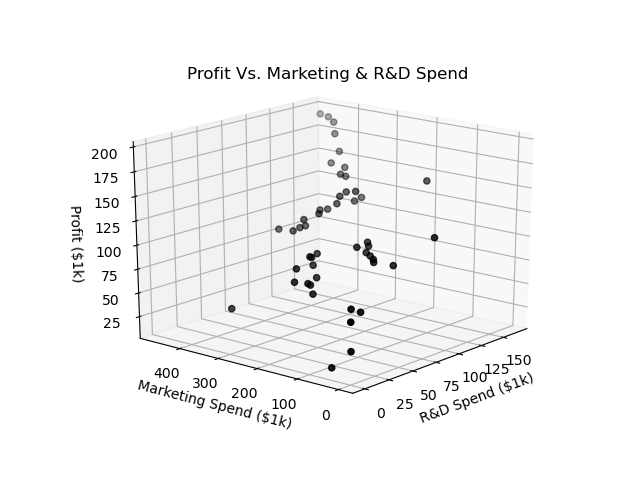

In [3]:
# Get data
x = df["R&D Spend"].to_numpy()
y = df["Marketing Spend"].to_numpy()
z = df["Profit"].to_numpy()

# Better formatting by dividing by 1000
xk = x / 1000
yk = y / 1000
zk = z / 1000

# Plot it!
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xk, yk, zk, c='k')
ax.view_init(azim=-140, elev=20)
ax.set_xlabel('R&D Spend ($1k)')
ax.set_ylabel('Marketing Spend ($1k)')
ax.set_zlabel('Profit ($1k)')
ax.set_title('Profit Vs. Marketing & R&D Spend')
fig.show()

## Develop the Equation

First, we create the $\textbf{X}$ matrix with our ones column. Then, we solve the following equation to find the constants $\textbf{a}$ in our equation $\hat{\textbf{y}} = \textbf{X}\textbf{a}$.

$$
\textbf{X}^T\textbf{X}\textbf{a} = \textbf{X}^T\textbf{y}
$$

In this case our $\textbf{y}$ is actually the `z` variable in our dataset.

In [4]:
# Construct input and output matrix
X = np.array([ np.ones((x.shape[0],)), x, y ]).transpose()

# Create variables
Xt = X.transpose()
A = np.matmul(Xt, X) # A = X^T X
B = np.matmul(Xt, z) # B = X^T y

# Now we solve our equation
Ainv = np.linalg.inv(A)
a = np.matmul(Ainv, B)
print('a:', a)

a: [4.73925419e+04 7.94973943e-01 2.89538549e-02]


## Evaluating and Plotting

Now we can plot this regression model on top of our data using a surface plot. We also compute the $R^2$ value same as in linear regression.

R^2 = 0.9475


<IPython.core.display.Javascript object>


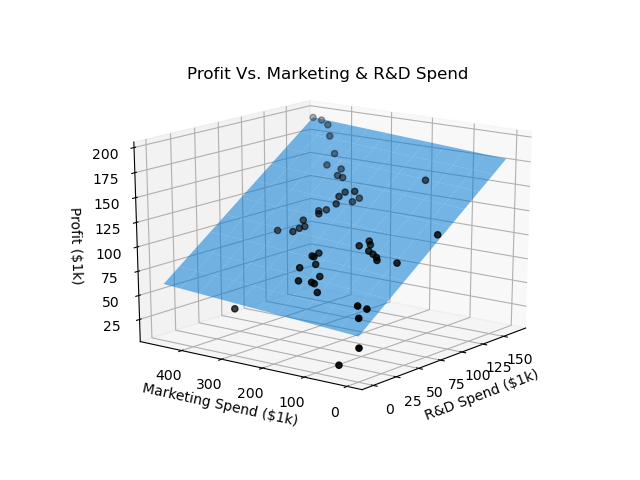

In [7]:
# Generate plot data
N = 100
xn = np.linspace(0, x.max(), N)
yn = np.linspace(0, y.max(), N)
xv, yv = np.meshgrid(xn, yn)
zv = a[0] + a[1]*xv + a[2]*yv

# Compute R^2
zHat = a[0] + a[1]*x + a[2]*y
V = ((z - z.mean())**2).sum()
J = ((z - zHat)**2).sum()
R2 = 1 - J/V
print('R^2 = {:.4f}'.format(R2))

# Again, divide everything by 1000
xvk = xv / 1000
yvk = yv / 1000
zvk = zv / 1000

# Plot it!
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xk, yk, zk, c='k', label='Actual')
ax.plot_surface(xvk, yvk, zvk, 
    rstride=10, 
    cstride=10, 
    color='#08e8', 
    label='Predicted (R^2 = {:.4f})'.format(R2))
ax.view_init(azim=-140, elev=20)
ax.set_xlabel('R&D Spend ($1k)')
ax.set_ylabel('Marketing Spend ($1k)')
ax.set_zlabel('Profit ($1k)')
ax.set_title('Profit Vs. Marketing & R&D Spend')
plt.show()

## Make a prediction

Create a single sample datapoint of R&D and Marketing spending and use our equation to predict the profit for a startup with that spending allocation

In [6]:
x0 = 130423.4
y0 = 233412.5
zHat = a[0] + a[1]*x0 + a[2]*y0
print(f'Predicted profit for a startup spending ${x0:.2f} on R&D and ${y0:.2f} on marketing = ${zHat:.2f}')

Predicted profit for a startup spending $130423.40 on R&D and $233412.50 on marketing = $157833.94
